Exp6 Basic linear regression model using builtin datasets


Dataset shape: (442, 10)
Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Multiple Feature Model:
Mean Squared Error: 2900.19
R-squared: 0.45
Coefficients: [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
Intercept: 151.35

Single Feature Model (BMI):
Mean Squared Error: 4061.83
R-squared: 0.23
Coefficient: 998.58
Intercept: 152.00


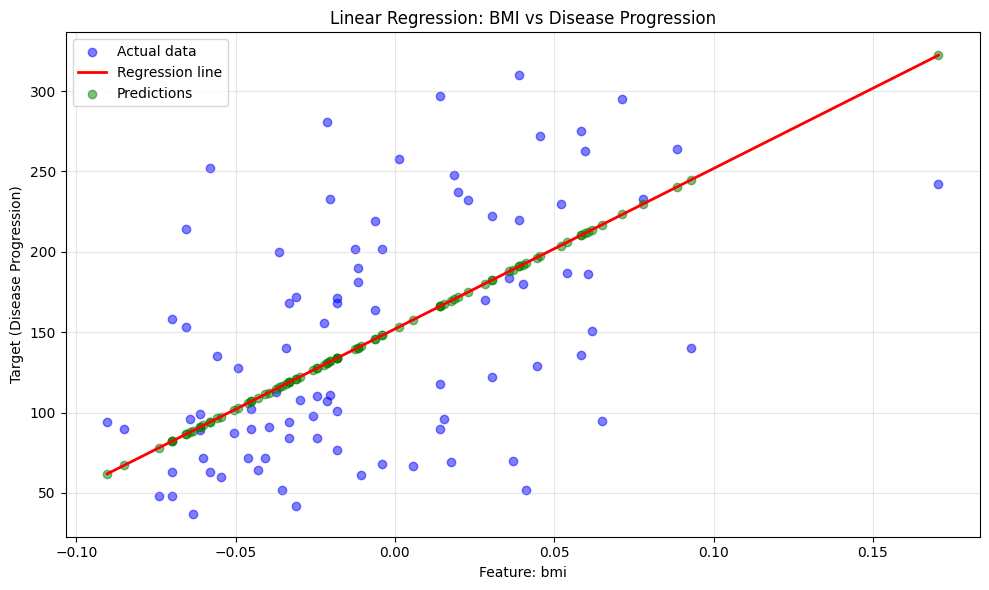

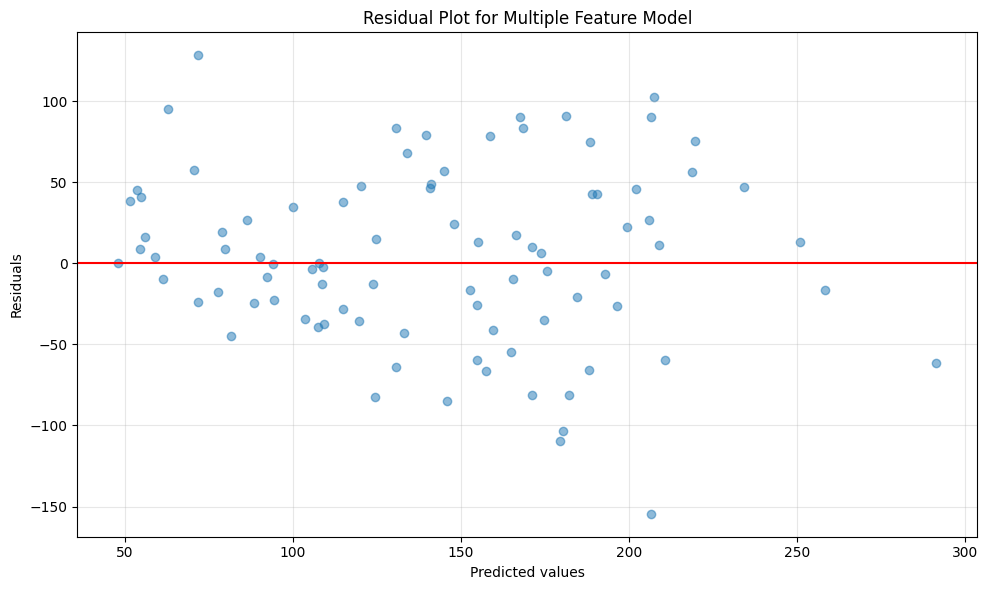

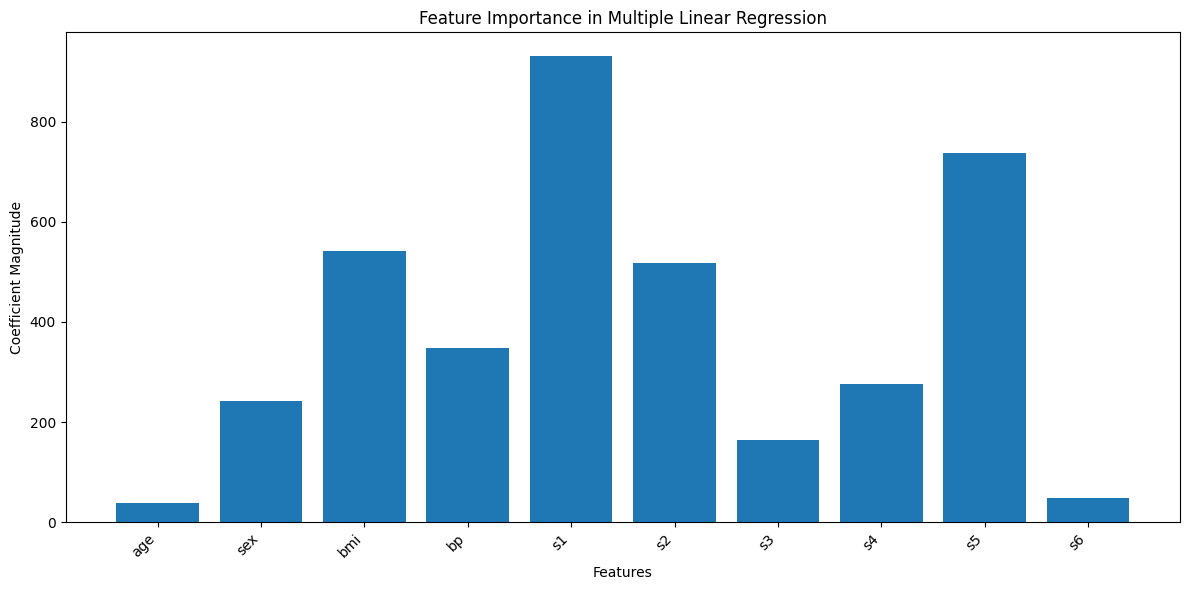

In [1]:
# Basic Linear Regression with Visualization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

print(f"Dataset shape: {X.shape}")
print(f"Feature names: {diabetes.feature_names}")

# For visualization purposes, let's use a single feature
feature_index = 2  # BMI feature
X_single_feature = X[:, feature_index].reshape(-1, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(
    X_single_feature, y, test_size=0.2, random_state=42)

# Create and train the multi-feature linear regression model
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Create and train the single-feature linear regression model
single_model = LinearRegression()
single_model.fit(X_train_single, y_train_single)

# Make predictions
y_pred_multi = multi_model.predict(X_test)
y_pred_single = single_model.predict(X_test_single)

# Evaluate the models
mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

mse_single = mean_squared_error(y_test_single, y_pred_single)
r2_single = r2_score(y_test_single, y_pred_single)

print("\nMultiple Feature Model:")
print(f"Mean Squared Error: {mse_multi:.2f}")
print(f"R-squared: {r2_multi:.2f}")
print(f"Coefficients: {multi_model.coef_}")
print(f"Intercept: {multi_model.intercept_:.2f}")

print("\nSingle Feature Model (BMI):")
print(f"Mean Squared Error: {mse_single:.2f}")
print(f"R-squared: {r2_single:.2f}")
print(f"Coefficient: {single_model.coef_[0]:.2f}")

print(f"Intercept: {single_model.intercept_:.2f}")

# Visualize the single feature model
plt.figure(figsize=(10, 6))

# Plot the actual data points
plt.scatter(X_test_single, y_test_single, color='blue', alpha=0.5, label='Actual data')

# Plot the regression line
x_range = np.linspace(X_single_feature.min(), X_single_feature.max(), 100).reshape(-1, 1)
y_pred_range = single_model.predict(x_range)
plt.plot(x_range, y_pred_range, color='red', linewidth=2, label='Regression line')

# Add predicted values
plt.scatter(X_test_single, y_pred_single, color='green', alpha=0.5, label='Predictions')

# Add labels and title
plt.xlabel(f'Feature: {diabetes.feature_names[feature_index]}')
plt.ylabel('Target (Disease Progression)')
plt.title('Linear Regression: BMI vs Disease Progression')
plt.legend()
plt.grid(True, alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

# Residual Plot for the multi-feature model
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred_multi
plt.scatter(y_pred_multi, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Multiple Feature Model')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Feature importance plot
plt.figure(figsize=(12, 6))
importance = np.abs(multi_model.coef_)
features = diabetes.feature_names
plt.bar(features, importance)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Feature Importance in Multiple Linear Regression')
plt.tight_layout()
plt.show()


viva questions
